In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py

import sys
sys.path.append('../../../../src')
from utils import smooth_curve
from viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics
from HorizontalLineProfileAnalyzer import HorizontalLineProfileAnalyzer
from AutoAlign import visualize_corners
from analyze_function import analyze_function

In [2]:
file = '../../../../datasets/YG051_YichenGuo_06122024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
print(keys)

ds_name = file.split('/')[-1].split('_')[0]
plumes = plume_ds.load_plumes('1-SrRuO3')

['1-SrRuO3', '1-SrRuO3_Pre']


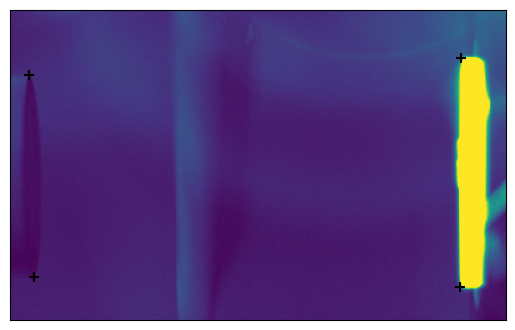

In [3]:
frame_view_YG051 = plume_ds.load_plumes('1-SrRuO3_Pre')[1][1]
coords_YG051 = np.array([[15,52], [19,215], [363,38], [362,223]])
px.imshow(frame_view_YG051)
visualize_corners(frame_view_YG051, coords_YG051, color='k', marker_size=50)

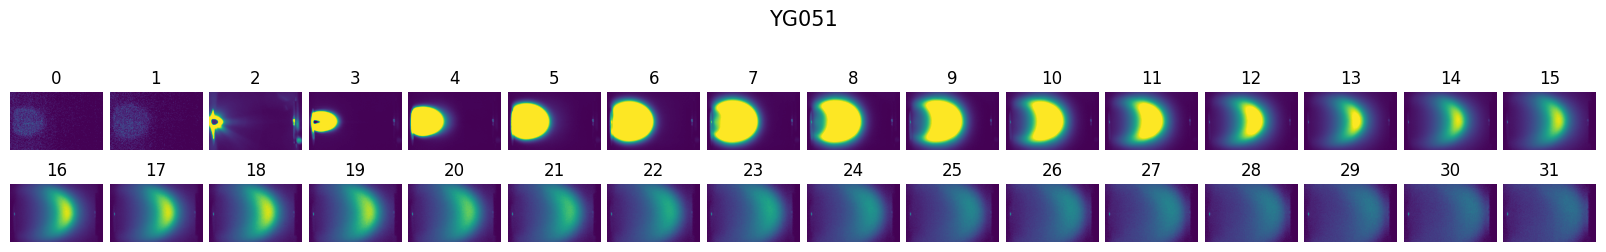

100%|██████████| 189/189 [01:22<00:00,  2.29it/s]


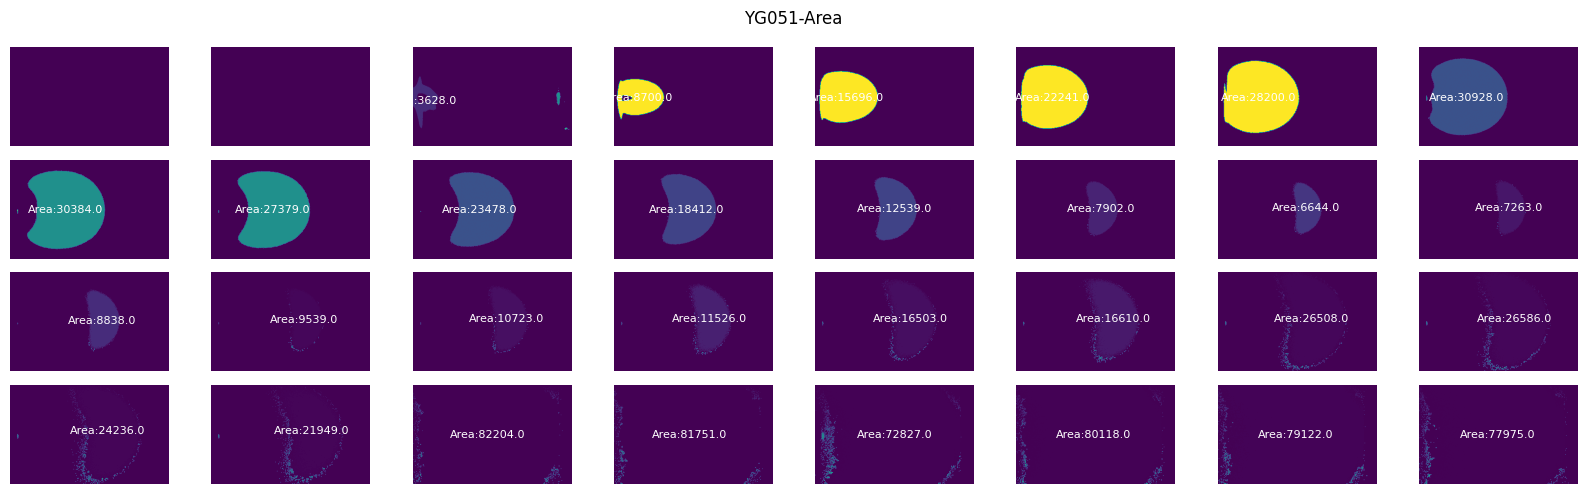

100%|██████████| 189/189 [00:17<00:00, 10.82it/s]


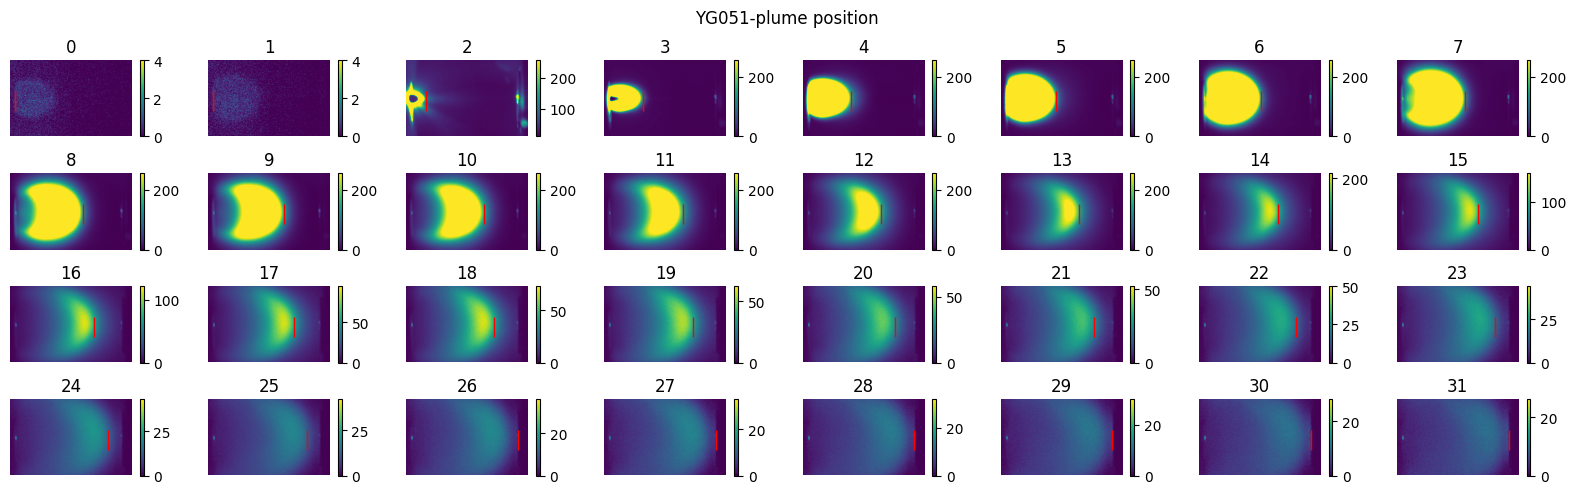

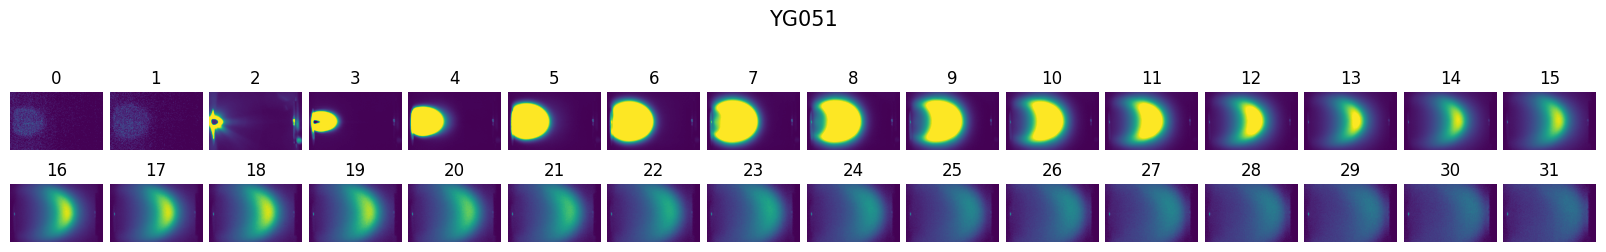

  3%|▎         | 5/189 [00:00<00:35,  5.19it/s]c:\Users\yig319\Anaconda3\envs\plume\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

c:\Users\yig319\Anaconda3\envs\plume\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide

c:\Users\yig319\Dropbox (LU Student)\plume_dynamic_analysis\notebooks\SRO\SRO_STO_Drexel_TSST\growth_logs\../../../../src\PlumeMetrics.py:74: RuntimeWarning:

invalid value encountered in cast

100%|██████████| 189/189 [00:37<00:00,  5.09it/s]


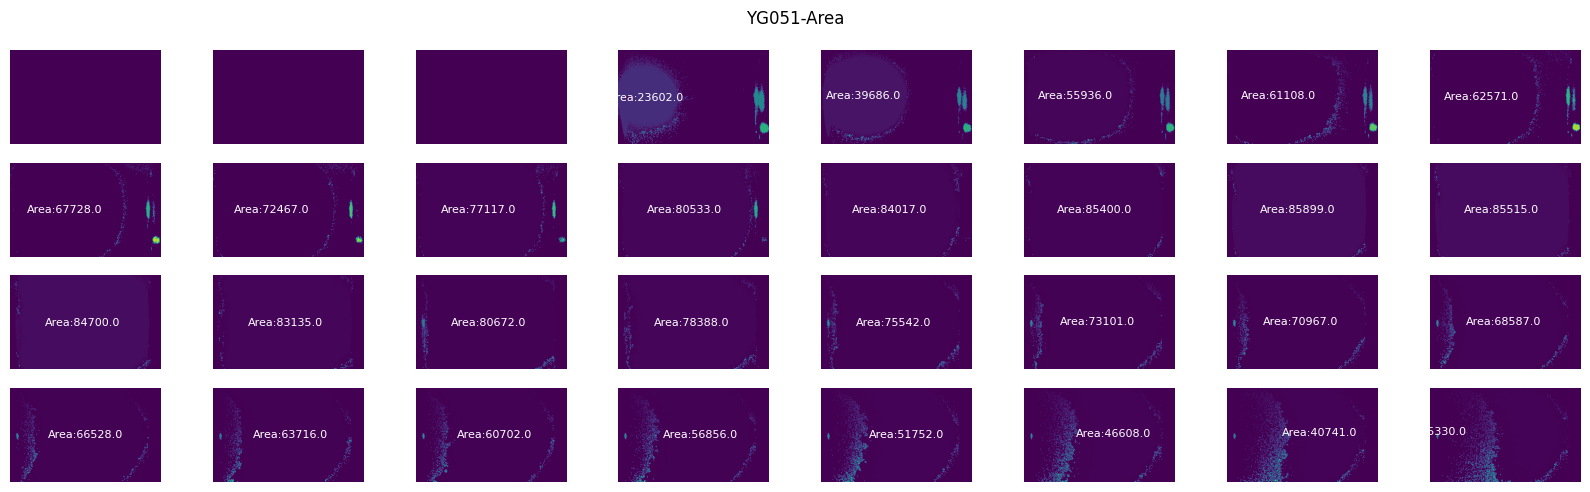

100%|██████████| 189/189 [03:32<00:00,  1.12s/it]


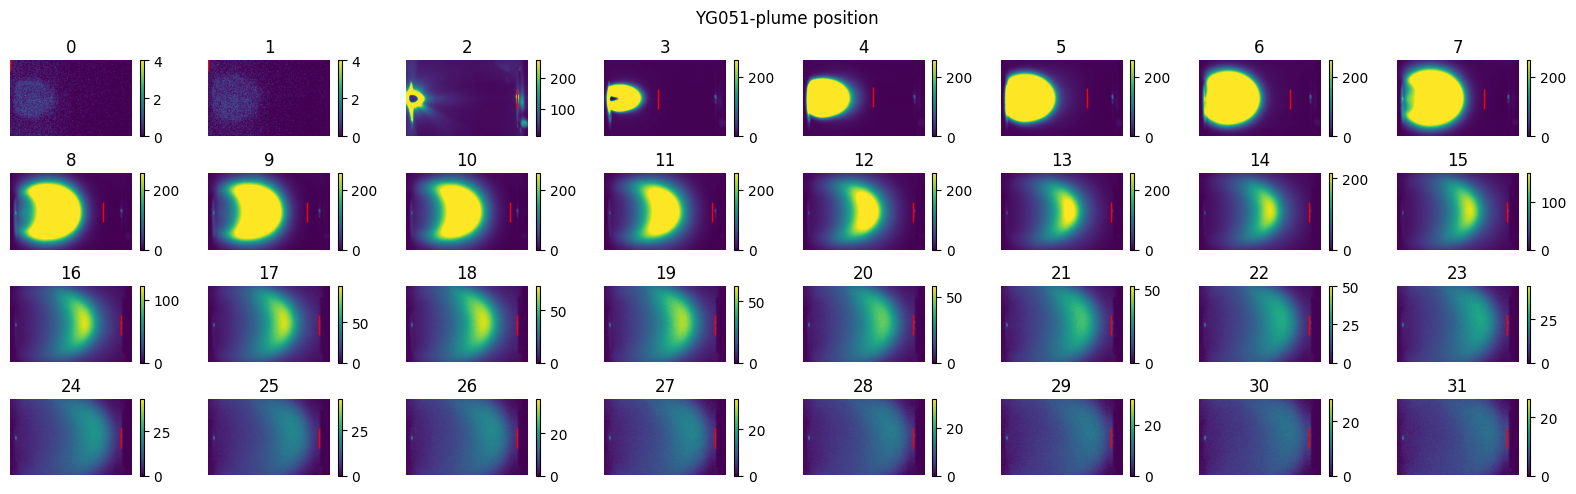

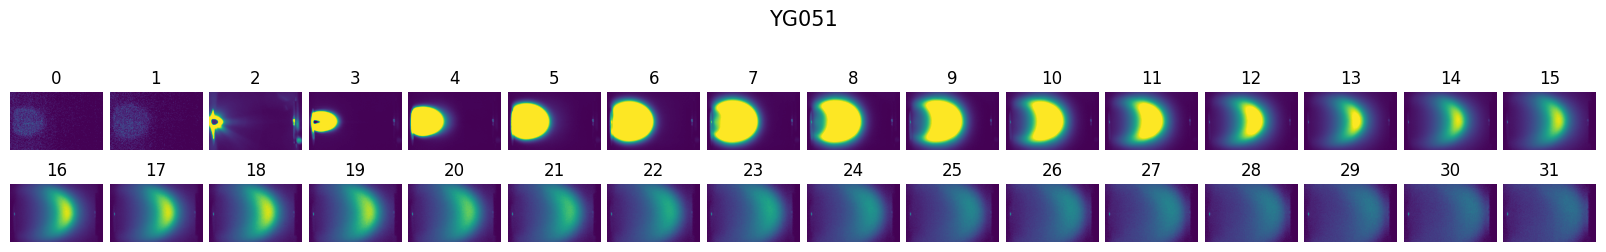

100%|██████████| 189/189 [00:22<00:00,  8.43it/s]


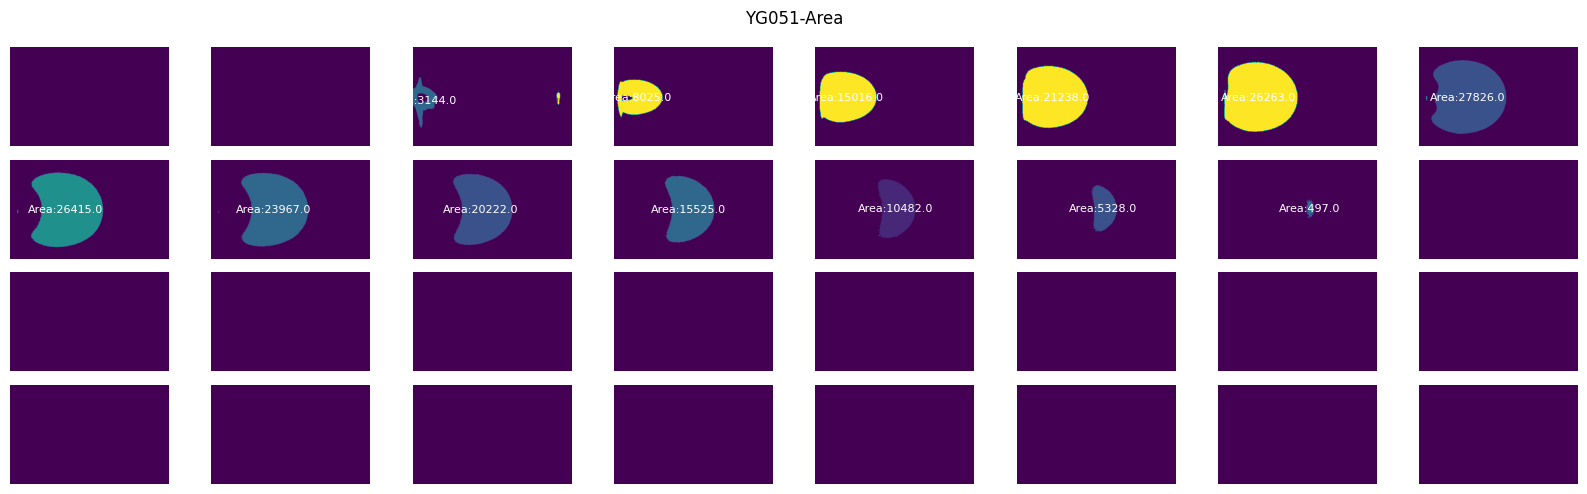

100%|██████████| 189/189 [00:26<00:00,  7.19it/s]


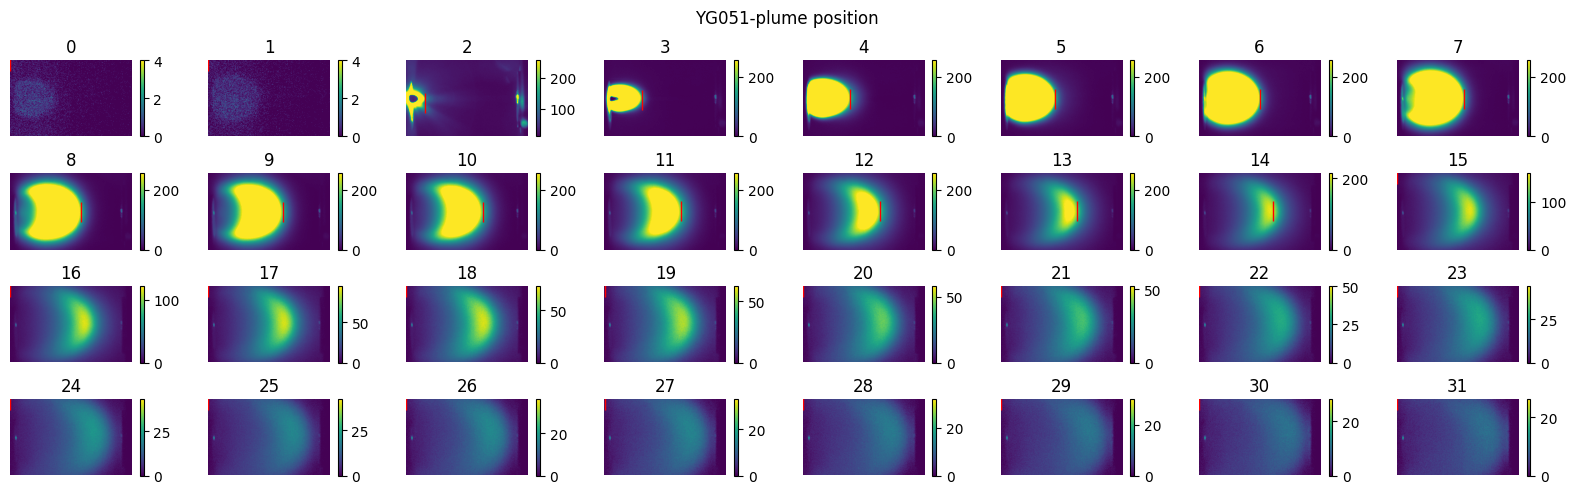

In [4]:
# visualize parameters
viz_parms = {'viz':True, 'index':5, 'viz_index':list(np.arange(0, 32, 1)), 'plume_name': ds_name}

# align parameters
align_parms = {'align':False, 'coords':coords_YG051, 'coords_standard':coords_YG051}

# metric parameters
start_position = np.round(np.mean(coords_YG051[:2], axis=0)).astype(np.int32) # start position of plume  (x, y)
position_range = np.min(coords_YG051[:,0]), np.max(coords_YG051[:,0]) # x position range

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':'flexible', 'rename_dataset':True}
df_flex = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':False, 'coords':coords_YG051, 'coords_standard':coords_YG051})

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':5, 'rename_dataset':True}
df_5 = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':True, 'coords':coords_YG051, 'coords_standard':coords_YG051})

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':200, 'rename_dataset':True}
df_200 = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':True, 'coords':coords_YG051, 'coords_standard':coords_YG051})

df_all = pd.concat([df_5, df_200, df_flex])
df_all.to_csv('../../../../datasets/SRO_plume_metrics/YG051_metrics.csv')

### plot

In [5]:
df_all = pd.read_csv('../../../../datasets/SRO_plume_metrics/YG051_metrics.csv')
print(df_all['Threshold'].unique())

['5' '200' 'flexible']


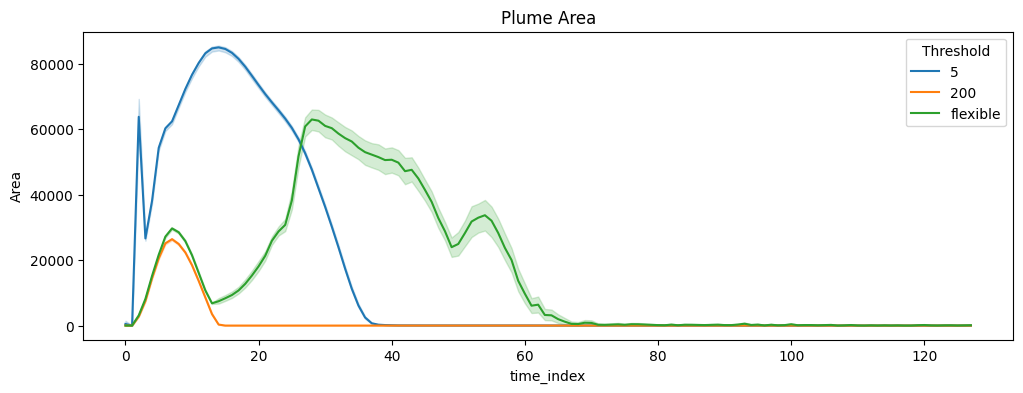

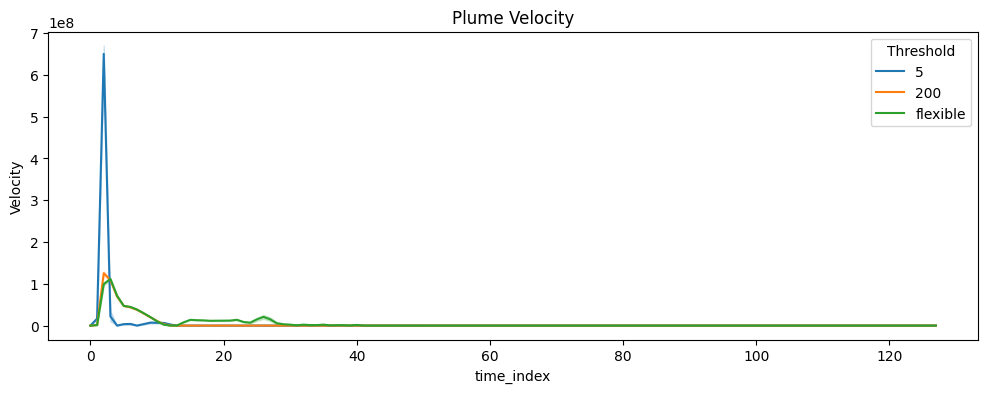

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Threshold", data=df_all)
plt.title('Plume Area')
# plt.xlim(0, 32)
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Threshold", data=df_all)
plt.title('Plume Velocity')
plt.show()